<a href="https://colab.research.google.com/github/ssnyu/RL-Informed-Oil-Trader/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crude Oil Price Forecasting Using Multivariate Time Series Data

## Import data

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/US_Crude_data_v1.csv')

# Convert 'Dates' column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'])

# Set 'Dates' column as index
df.set_index('Dates', inplace=True)

df = df.fillna(0)

In [164]:
df.columns

Index(['Crude_Oil_Prod', 'Nat_Gas_Prod', 'Coal_Prod', 'Total_Energy_Prod',
       'Liq_Fuels_Cons', 'Nat_Gas_Cons', 'Coal_Cons', 'Elec_Cons',
       'Renew_Cons', 'Total_Energy_Cons', 'Crude_Oil_Price', 'Nat_Gas_Price',
       'Coal_Price', 'Real_GDP', 'Real_GDP_YOY', 'GDP_IPD', 'GDP_IPD_YOY',
       'Real_DPI', 'Real_DPI_YOY', 'Mfg_Prod_Index', 'Mfg_Prod_Index_YOY',
       'TB1YR_Rate', 'TB3MS_Rate', 'Mort_Rate', 'CPI', 'CPI_YOY', 'CPI_MOM'],
      dtype='object')

## Exploratory Data analysis

In [165]:
# Summary statistics
df.describe()

,Crude_Oil_Prod,Nat_Gas_Prod,Coal_Prod,Total_Energy_Prod,Liq_Fuels_Cons,Nat_Gas_Cons,Coal_Cons,Elec_Cons,Renew_Cons,Total_Energy_Cons,...,Real_DPI,Real_DPI_YOY,Mfg_Prod_Index,Mfg_Prod_Index_YOY,TB1YR_Rate,TB3MS_Rate,Mort_Rate,CPI,CPI_YOY,CPI_MOM
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,...,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,7.512039,63.458277,80.310680,5.389345,19.192549,52.430073,75.160194,9.948665,0.262354,7.534976,...,11798.169903,2.613835,89.327670,1.710194,2.254248,2.631796,5.812379,204.947573,2.702184,0.218932
std,2.408019,17.113297,16.422066,0.567695,1.237976,34.313053,18.743072,1.296174,0.312402,1.040323,...,2973.276915,2.937355,14.181353,4.816536,2.369218,2.228340,2.244595,46.910439,1.638161,0.343137
min,3.970000,44.540000,37.000000,4.510000,14.550000,0.000000,22.000000,7.040000,0.000000,5.250000,...,7179.000000,-21.500000,56.500000,-19.500000,0.000000,0.010000,3.250000,127.400000,-2.100000,-1.900000
25%,5.667500,51.317500,70.750000,4.990000,18.530000,0.000000,68.000000,9.137500,0.000000,6.667500,...,9291.750000,1.600000,84.050000,-0.200000,0.110000,0.180000,3.250000,163.350000,1.700000,0.000000
50%,6.575000,53.625000,86.000000,5.155000,19.345000,60.395000,79.000000,9.885000,0.000000,7.740000,...,12015.500000,2.900000,94.500000,2.300000,1.130000,2.290000,5.500000,204.650000,2.600000,0.200000
75%,9.092500,73.125000,92.000000,5.622500,20.140000,77.242500,88.000000,10.895000,0.610000,8.272500,...,13977.250000,3.700000,99.725000,4.400000,4.690000,4.885000,8.250000,237.925000,3.300000,0.400000
max,13.270000,105.190000,104.000000,6.860000,21.670000,115.910000,106.000000,12.980000,0.780000,9.760000,...,20423.000000,30.100000,106.400000,20.800000,7.800000,7.900000,10.110000,313.500000,9.100000,1.400000


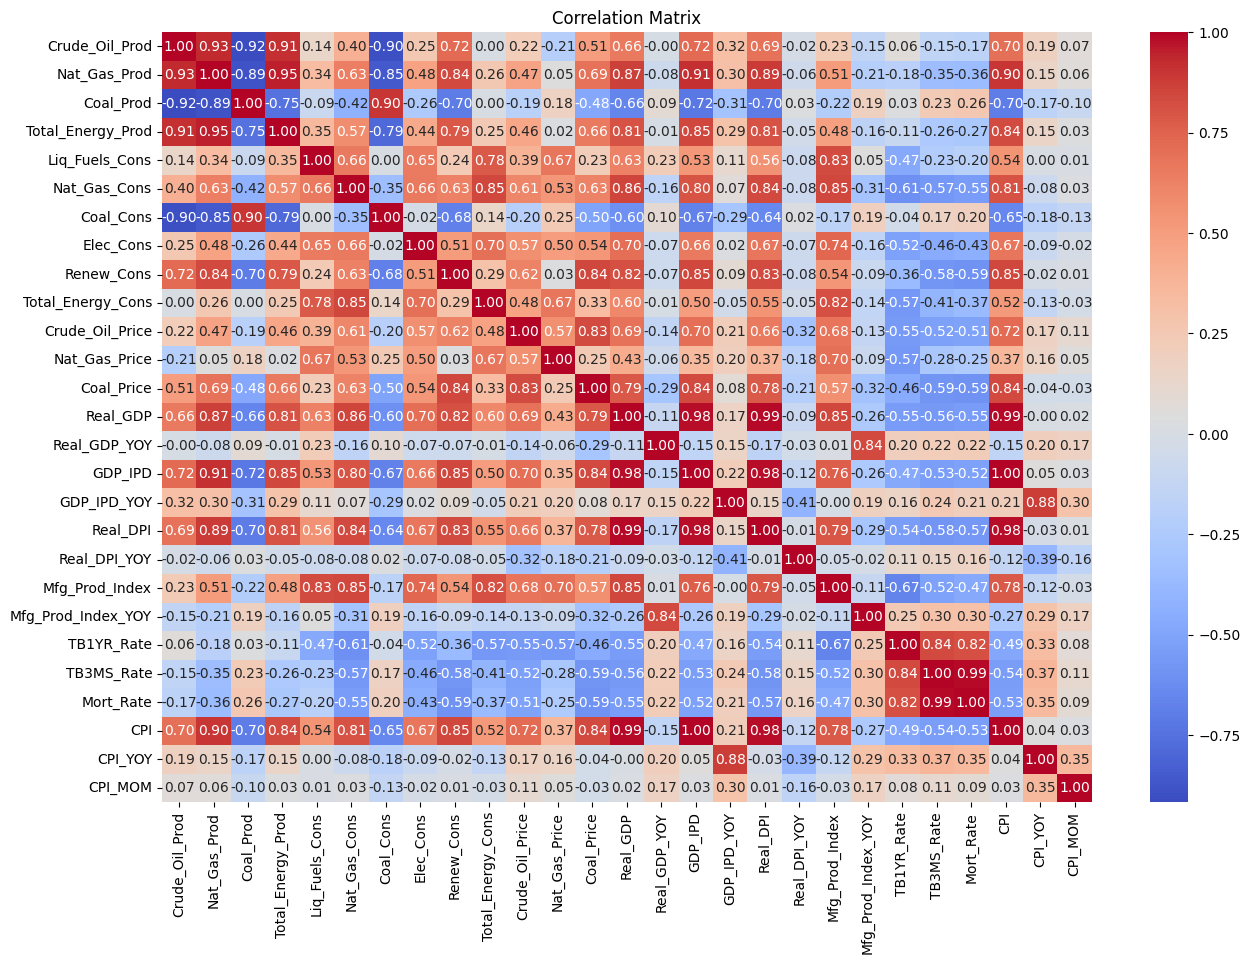

In [166]:
import seaborn as sns
# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

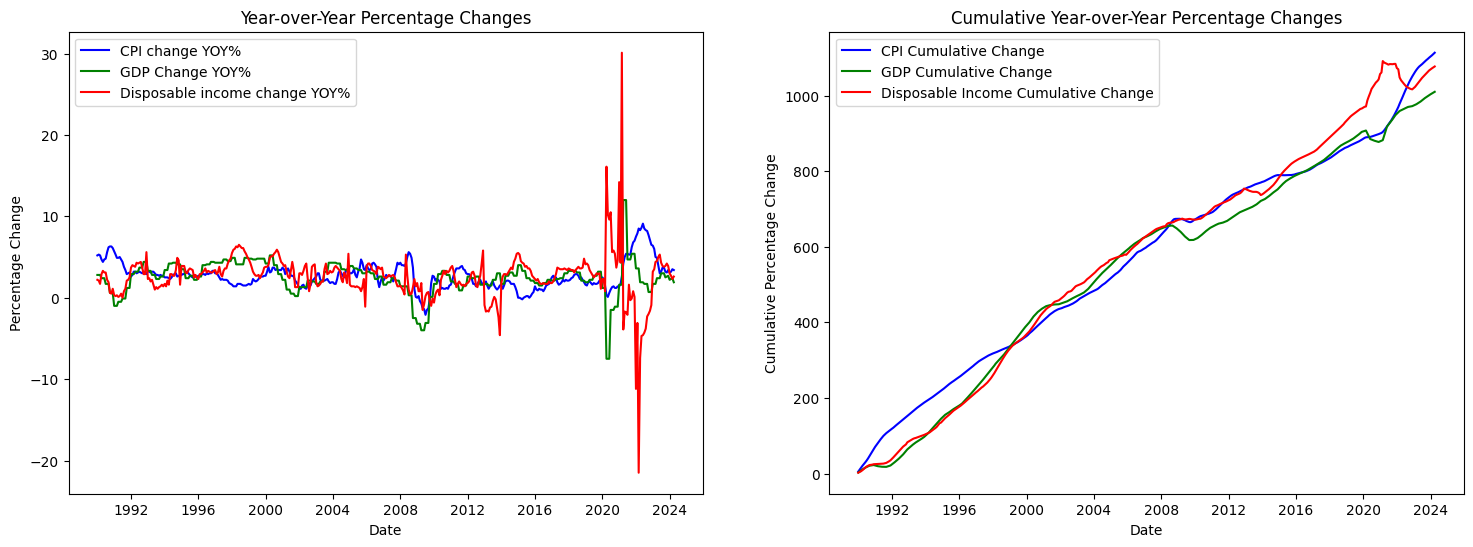

In [167]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot Year-over-Year Percentage Changes
axes[0].plot(df.index, df['CPI_YOY'], label='CPI change YOY%', color='blue')
axes[0].plot(df.index, df['Real_GDP_YOY'], label='GDP Change YOY%', color='green')
axes[0].plot(df.index, df['Real_DPI_YOY'], label='Disposable income change YOY%', color='red')
axes[0].set_title('Year-over-Year Percentage Changes')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Percentage Change')
axes[0].legend()

# Plot Cumulative Sum of Year-over-Year Percentage Changes
axes[1].plot(df.index, df['CPI_YOY'].cumsum(), label='CPI Cumulative Change', color='blue')
axes[1].plot(df.index, df['Real_GDP_YOY'].cumsum(), label='GDP Cumulative Change', color='green')
axes[1].plot(df.index, df['Real_DPI_YOY'].cumsum(), label='Disposable Income Cumulative Change', color='red')
axes[1].set_title('Cumulative Year-over-Year Percentage Changes')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Cumulative Percentage Change')
axes[1].legend()

plt.show()

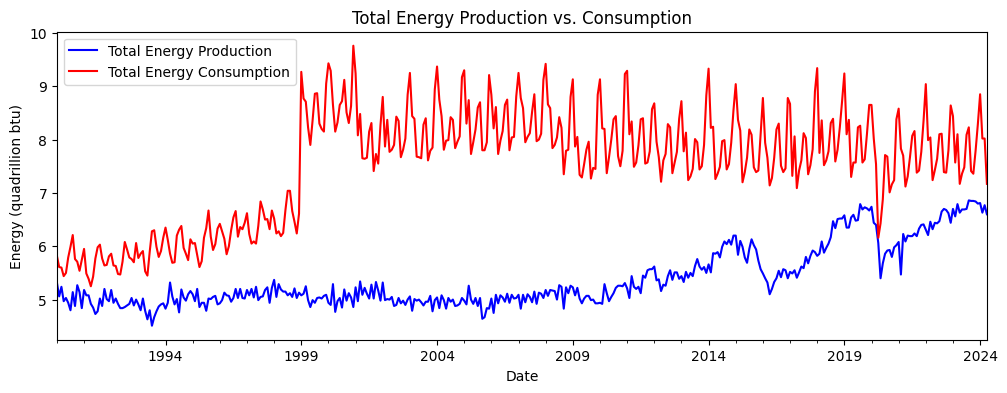

In [168]:
# Plot total energy production and consumption
plt.figure(figsize=(12, 4))
df['Total_Energy_Prod'].plot(label='Total Energy Production',color='blue')
df['Total_Energy_Cons'].plot(label='Total Energy Consumption',color='red')
plt.title('Total Energy Production vs. Consumption')
plt.xlabel('Date')
plt.ylabel('Energy (quadrillion btu)')
plt.legend()
plt.show()

## Data Preparation

In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Features (independent variables)
features = df.drop(columns=['Crude_Oil_Price'])

# Target variable (dependent variable)
target = df['Crude_Oil_Price']

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.10, shuffle = False)

# Print shapes of training and validation sets
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_valid.shape)
print("Training target shape:", y_train.shape)
print("Validation target shape:", y_valid.shape)

Training features shape: (370, 26)
Validation features shape: (42, 26)
Training target shape: (370,)
Validation target shape: (42,)


## Model Design

### Linear Regression

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_valid_pred = model.predict(X_valid)

In [171]:
# Compute evaluation metrics
mse = mean_squared_error(y_valid, y_valid_pred)
mae = mean_absolute_error(y_valid, y_valid_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 2389.019879759772
Mean Absolute Error (MAE): 45.187257827508674
Root Mean Squared Error (RMSE): 48.87760100250187


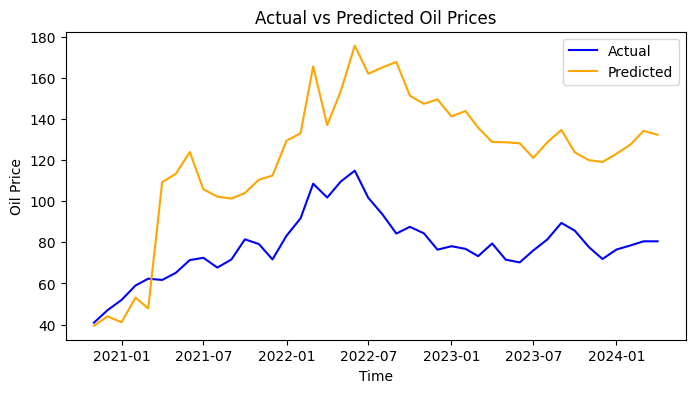

In [172]:
# Visualize the predictions
plt.figure(figsize=(8, 4))
plt.plot(y_valid.index, y_valid, label='Actual', color='blue')
plt.plot(y_valid.index, y_valid_pred, label='Predicted', color='orange')
plt.title('Actual vs Predicted Oil Prices')
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.legend()
plt.show()

In [173]:
# Calculate the sign of the differences between consecutive actual values
actual_changes = np.sign(np.diff(y_valid))

# Calculate the sign of the differences between consecutive predicted values
predicted_changes = np.sign(np.diff(y_valid_pred))

# Compute the number of correct directional predictions
correct_directions = np.sum(actual_changes == predicted_changes)

# Calculate directional accuracy
directional_accuracy = correct_directions / len(actual_changes)
directional_accuracy_percentage = directional_accuracy * 100

print("Linear Regression Directional Accuracy:", round(directional_accuracy_percentage,2), "%")

Linear Regression Directional Accuracy: 60.98 %


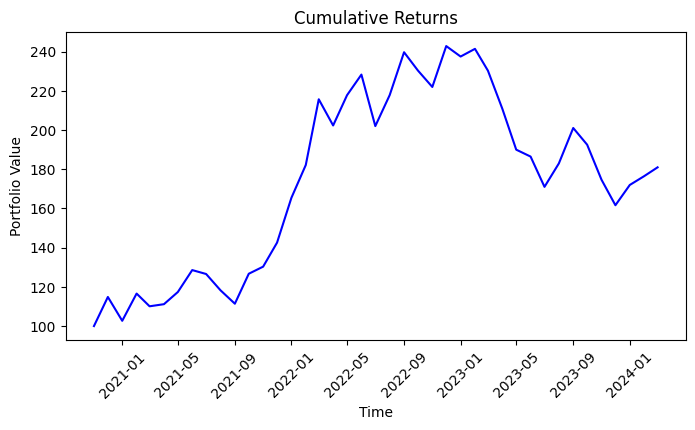

In [174]:
# Calculate returns based on trading signals
returns = pd.Series(index=y_valid.index)
for i in range(1, len(y_valid_pred)):
    if np.sign(np.diff(y_valid_pred))[i-1] > 0:  # Buy signal
        returns.iloc[i] = (y_valid.iloc[i] - y_valid.iloc[i-1]) / y_valid.iloc[i-1]
    else:  # Sell signal
        returns.iloc[i] = (y_valid.iloc[i-1] - y_valid.iloc[i]) / y_valid.iloc[i-1]

# Calculate Sharpe ratio
sharpe_ratio = returns.mean() / returns.std()

# Calculate cumulative returns starting with $100
cumulative_returns = pd.Series(index=y_valid.index)
cumulative_returns.iloc[0] = 100  # Initial investment of $100

for i in range(1, len(y_valid_pred)):
    if np.sign(np.diff(y_valid))[i-1] > 0:  # Buy signal
        cumulative_returns.iloc[i] = cumulative_returns.iloc[i-1] * (1 + returns.iloc[i])
    elif np.sign(np.diff(y_valid))[i-1] < 0:  # Sell signal
        cumulative_returns.iloc[i] = cumulative_returns.iloc[i-1] * (1 - returns.iloc[i])
cumulative_returns = cumulative_returns[:-1] # since last day no signal

# Visualize cumulative returns
plt.figure(figsize=(8, 4))
plt.plot(cumulative_returns.index, cumulative_returns.values, color='blue')
plt.title('Cumulative Returns')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')

# Tilt x-axis labels
plt.xticks(rotation=45)
plt.show()

In [175]:
# Calculate annualized returns
annualized_returns = (cumulative_returns.iloc[-1] / cumulative_returns.iloc[0]) ** (12 / len(cumulative_returns)) - 1

# Calculate maximum drawdown
cumulative_max = cumulative_returns.cummax()
drawdown = (cumulative_max - cumulative_returns) / cumulative_max
max_drawdown = drawdown.max()

# Print metrics
print("Sharpe Ratio:", round(sharpe_ratio,2))
print("Annualized Returns:", round(annualized_returns*100,2) , '%')
print("Maximum Drawdown:", round(max_drawdown*100,2), '%')

Sharpe Ratio: 0.37
Annualized Returns: 18.96 %
Maximum Drawdown: 33.44 %


### XGB

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb


# Train XGBoost model
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
model_xgb.fit(X_train, y_train)

# Make predictions with XGBoost model
y_valid_pred_xgb = model_xgb.predict(X_valid)

In [177]:
# Compute evaluation metrics for XGBoost model
mse_xgb = mean_squared_error(y_valid, y_valid_pred_xgb)
mae_xgb = mean_absolute_error(y_valid, y_valid_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("XGBoost Model:")
print("Mean Squared Error (MSE):", mse_xgb)
print("Mean Absolute Error (MAE):", mae_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)

XGBoost Model:
Mean Squared Error (MSE): 712.4873362803995
Mean Absolute Error (MAE): 23.013928277151926
Root Mean Squared Error (RMSE): 26.69245841582224


In [178]:
# Calculate the sign of the differences between consecutive actual values
actual_changes = np.sign(np.diff(y_valid.values))

# Calculate the sign of the differences between consecutive predicted values
predicted_changes = np.sign(np.diff(y_valid_pred_xgb))

# Compute the number of correct directional predictions
correct_directions = np.sum(actual_changes == predicted_changes)

# Calculate directional accuracy
directional_accuracy = correct_directions / len(actual_changes)
directional_accuracy_percentage = directional_accuracy * 100

print("XGBoost Model:")
print("Directional Accuracy:",  round(directional_accuracy_percentage,2), "%")

XGBoost Model:
Directional Accuracy: 60.98 %


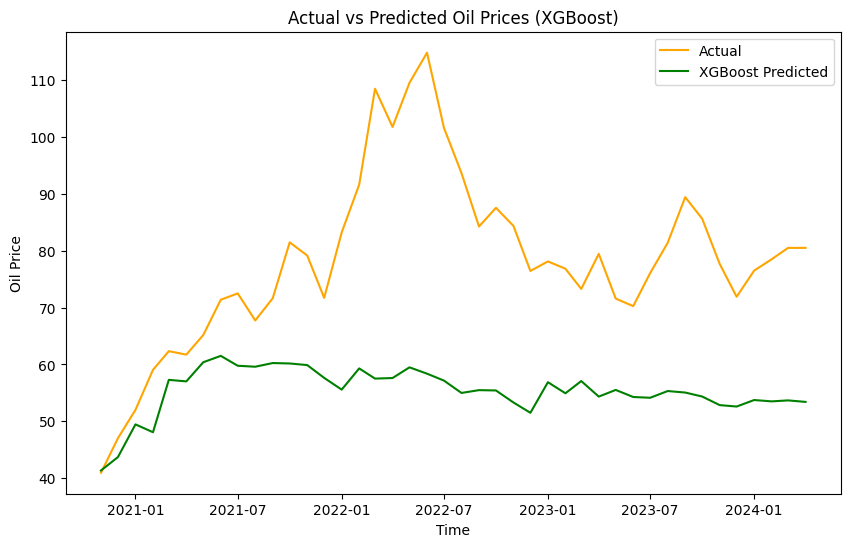

In [179]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_valid.index, y_valid.values, label='Actual', color='orange')
plt.plot(y_valid.index, y_valid_pred_xgb, label='XGBoost Predicted', color='green')
plt.title('Actual vs Predicted Oil Prices (XGBoost)')
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.legend()
plt.show()

In [180]:
# Calculate returns based on trading signals for XGBoost model
returns_xgb = pd.Series(index=y_valid.index)
for i in range(1, len(y_valid_pred_xgb)):
    if np.sign(np.diff(y_valid_pred_xgb))[i-1] > 0:  # Buy signal
        returns_xgb.iloc[i] = (y_valid.iloc[i] - y_valid.iloc[i-1]) / y_valid.iloc[i-1]
    else:  # Sell signal
        returns_xgb.iloc[i] = (y_valid.iloc[i-1] - y_valid.iloc[i]) / y_valid.iloc[i-1]

# Calculate Sharpe ratio for XGBoost model
sharpe_ratio_xgb = returns_xgb.mean() / returns_xgb.std()

# Calculate cumulative returns starting with $100 for XGBoost model
cumulative_returns_xgb = pd.Series(index=y_valid.index)
cumulative_returns_xgb.iloc[0] = 100  # Initial investment of $100

for i in range(1, len(y_valid_pred_xgb)):
    if np.sign(np.diff(y_valid_pred_xgb))[i-1] > 0:  # Buy signal
        cumulative_returns_xgb.iloc[i] = cumulative_returns_xgb.iloc[i-1] * (1 + returns_xgb.iloc[i])
    else:  # Sell signal
        cumulative_returns_xgb.iloc[i] = cumulative_returns_xgb.iloc[i-1] * (1 - returns_xgb.iloc[i])


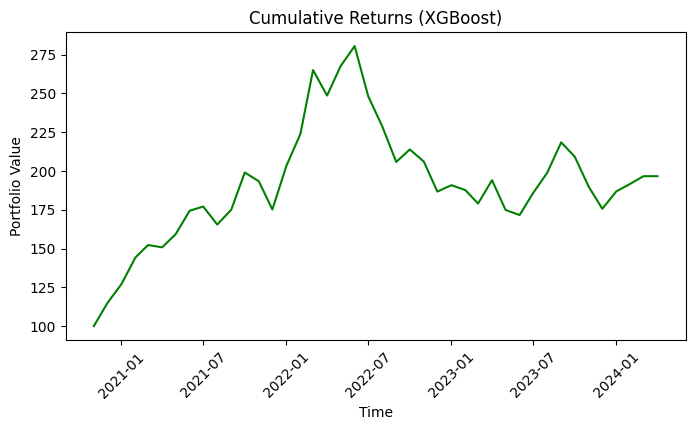

In [181]:
# Visualize cumulative returns for XGBoost model
plt.figure(figsize=(8, 4))
plt.plot(cumulative_returns_xgb.index, cumulative_returns_xgb.values, color='green')
plt.title('Cumulative Returns (XGBoost)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.xticks(rotation=45)
plt.show()

In [182]:
# Calculate annualized returns for XGBoost model
annualized_returns_xgb = (cumulative_returns_xgb.iloc[-1] / cumulative_returns_xgb.iloc[0]) ** (12 / len(cumulative_returns_xgb)) - 1

# Calculate maximum drawdown for XGBoost model
cumulative_max_xgb = cumulative_returns_xgb.cummax()
drawdown_xgb = (cumulative_max_xgb - cumulative_returns_xgb) / cumulative_max_xgb
max_drawdown_xgb = drawdown_xgb.max()

# Print metrics for XGBoost model
print("XGBoost Model Metrics:")
print("Sharpe Ratio:", round(sharpe_ratio_xgb, 2))
print("Annualized Returns:", round(annualized_returns_xgb * 100, 2), '%')
print("Maximum Drawdown:", round(max_drawdown_xgb * 100, 2), '%')

XGBoost Model Metrics:
Sharpe Ratio: 0.09
Annualized Returns: 21.31 %
Maximum Drawdown: 38.83 %


## LSTM

Single value inputs

In [183]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
# Define LSTM model
model = Sequential([
    Dense(units=512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_valid, y_valid), verbose=0)

# Make predictions on the validation set
y_valid_pred = model.predict(X_valid).flatten()

2/2 [==============================] - 0s 8ms/step


In [184]:
# Compute evaluation metrics
mse = mean_squared_error(y_valid, y_valid_pred)
mae = mean_absolute_error(y_valid, y_valid_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 396.3669207366709
Mean Absolute Error (MAE): 17.204962597801572
Root Mean Squared Error (RMSE): 19.90896583795027


In [185]:
# Calculate directional accuracy
actual_changes = np.sign(np.diff(y_valid.values))
predicted_changes = np.sign(np.diff(y_valid_pred.ravel()))
correct_directions = np.sum(actual_changes == predicted_changes)
directional_accuracy = correct_directions / len(actual_changes)
directional_accuracy_percentage = directional_accuracy * 100
print("LSTM Directional Accuracy:", directional_accuracy_percentage, "%")

LSTM Directional Accuracy: 51.21951219512195 %


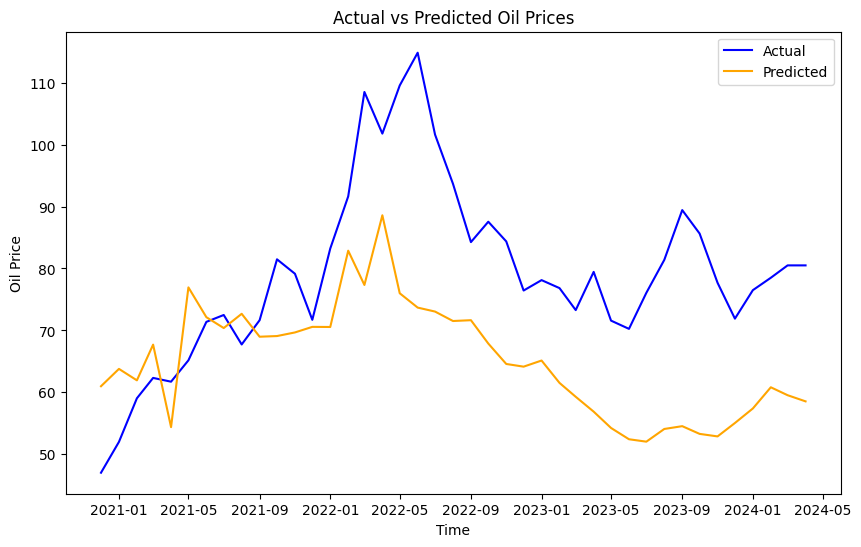

In [186]:
# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_valid.index[1:], y_valid.values[1:], label='Actual', color='blue')
plt.plot(y_valid.index[1:], y_valid_pred[:-1], label='Predicted', color='orange')  # Adjusted index
plt.title('Actual vs Predicted Oil Prices')
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.legend()
plt.show()

In [187]:
# Calculate returns based on trading signals for LSTM model
returns_lstm = pd.Series(index=y_valid.index)
for i in range(1, len(y_valid_pred)):
    if np.sign(np.diff(y_valid_pred))[i-1] > 0:  # Buy signal
        returns_lstm.iloc[i] = (y_valid.iloc[i] - y_valid.iloc[i-1]) / y_valid.iloc[i-1]
    else:  # Sell signal
        returns_lstm.iloc[i] = (y_valid.iloc[i-1] - y_valid.iloc[i]) / y_valid.iloc[i-1]

# Calculate Sharpe ratio for LSTM model
sharpe_ratio_lstm = returns_lstm.mean() / returns_lstm.std()

# Calculate cumulative returns starting with $100 for LSTM model
cumulative_returns_lstm = pd.Series(index=y_valid.index)
cumulative_returns_lstm.iloc[0] = 100  # Initial investment of $100

for i in range(1, len(y_valid_pred)):
    if np.sign(np.diff(y_valid))[i-1] > 0:  # Buy signal
        cumulative_returns_lstm.iloc[i] = cumulative_returns_lstm.iloc[i-1] * (1 + returns_lstm.iloc[i])
    elif np.sign(np.diff(y_valid))[i-1] < 0:  # Sell signal
        cumulative_returns_lstm.iloc[i] = cumulative_returns_lstm.iloc[i-1] * (1 - returns_lstm.iloc[i])
cumulative_returns_lstm = cumulative_returns_lstm[:-1] # since last day no signal

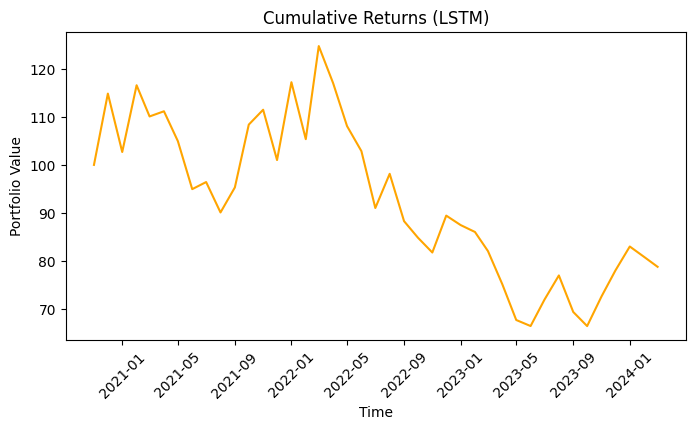

LSTM Model Metrics:
Sharpe Ratio: 0.16
Annualized Returns: -6.74 %
Maximum Drawdown: 46.74 %


In [188]:
# Visualize cumulative returns for LSTM model
plt.figure(figsize=(8, 4))
plt.plot(cumulative_returns_lstm.index, cumulative_returns_lstm.values, color='orange')
plt.title('Cumulative Returns (LSTM)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.xticks(rotation=45)
plt.show()

# Calculate annualized returns for LSTM model
annualized_returns_lstm = (cumulative_returns_lstm.iloc[-1] / cumulative_returns_lstm.iloc[0]) ** (12 / len(cumulative_returns_lstm)) - 1

# Calculate maximum drawdown for LSTM model
cumulative_max_lstm = cumulative_returns_lstm.cummax()
drawdown_lstm = (cumulative_max_lstm - cumulative_returns_lstm) / cumulative_max_lstm
max_drawdown_lstm = drawdown_lstm.max()

# Print metrics for LSTM model
print("LSTM Model Metrics:")
print("Sharpe Ratio:", round(sharpe_ratio_lstm, 2))
print("Annualized Returns:", round(annualized_returns_lstm * 100, 2), '%')
print("Maximum Drawdown:", round(max_drawdown_lstm * 100, 2), '%')

## Transformer

In [189]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(seq_length, len(data)):
        sequence = data[i - seq_length:i]
        sequences.append(sequence)
    return np.array(sequences)

# Define sequence length
seq_length = 10

# Create sequences
X_train_seq = create_sequences(X_train, seq_length)
X_valid_seq = create_sequences(X_valid, seq_length)
y_train_seq = y_train[seq_length:]  # Target values for X_train_seq, starting from the 5th day
y_valid_seq = y_valid[seq_length:]  # Target values for X_valid_seq, starting from the 5th day

print("Shape of X_train_seq:", X_valid_seq.shape[0])
print("Shape of X_valid_seq:", X_valid_seq.shape[0] == y_valid_seq.shape[0])

Shape of X_train_seq: 32
Shape of X_valid_seq: True


In [190]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, GlobalAveragePooling1D

# Define the Transformer model
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Add()([x, inputs])

    # Feed Forward Part
    y = LayerNormalization(epsilon=1e-6)(x)
    y = Dense(ff_dim, activation="relu")(y)
    y = Dropout(dropout)(y)
    y = Dense(inputs.shape[-1])(y)
    return Add()([y, x])

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_layers, dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs

    # Create multiple layers of the Transformer block
    for _ in range(num_layers):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    # Final part of the model
    x = GlobalAveragePooling1D()(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    outputs = Dense(1, activation="linear")(x)

    # Compile model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Model parameters
input_shape = X_train_seq.shape[1:]
head_size = 32
num_heads = 4
ff_dim = 256
num_layers = 5
dropout = 0.0

# Build the model
model = build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_layers, dropout)
#model.summary()

In [191]:
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_seq, y_train_seq, epochs=200, batch_size=32, validation_data=(X_valid_seq, y_valid_seq))

Epoch 1/200
12/12 [==============================] - 15s 115ms/step - loss: 3196.1062 - val_loss: 7241.5352
Epoch 2/200
12/12 [==============================] - 1s 46ms/step - loss: 3172.7009 - val_loss: 7201.3999
Epoch 3/200
12/12 [==============================] - 1s 43ms/step - loss: 3148.4727 - val_loss: 7159.4570
Epoch 4/200
12/12 [==============================] - 1s 43ms/step - loss: 3122.3059 - val_loss: 7114.9092
Epoch 5/200
12/12 [==============================] - 0s 41ms/step - loss: 3093.9353 - val_loss: 7065.4746
Epoch 6/200
12/12 [==============================] - 1s 41ms/step - loss: 3060.8914 - val_loss: 7010.1357
Epoch 7/200
12/12 [==============================] - 1s 61ms/step - loss: 3022.4731 - val_loss: 6946.5132
Epoch 8/200
12/12 [==============================] - 1s 78ms/step - loss: 2976.8882 - val_loss: 6871.2119
Epoch 9/200
12/12 [==============================] - 1s 75ms/step - loss: 2922.8535 - val_loss: 6780.6631
Epoch 10/200
12/12 [========================

1/1 [==============================] - 1s 690ms/step
Mean Squared Error (MSE): 1346.2459904171626
Mean Absolute Error (MAE): 34.89591951847076
Root Mean Squared Error (RMSE): 36.691224978421786
Directional Accuracy: 48.38709677419355 %


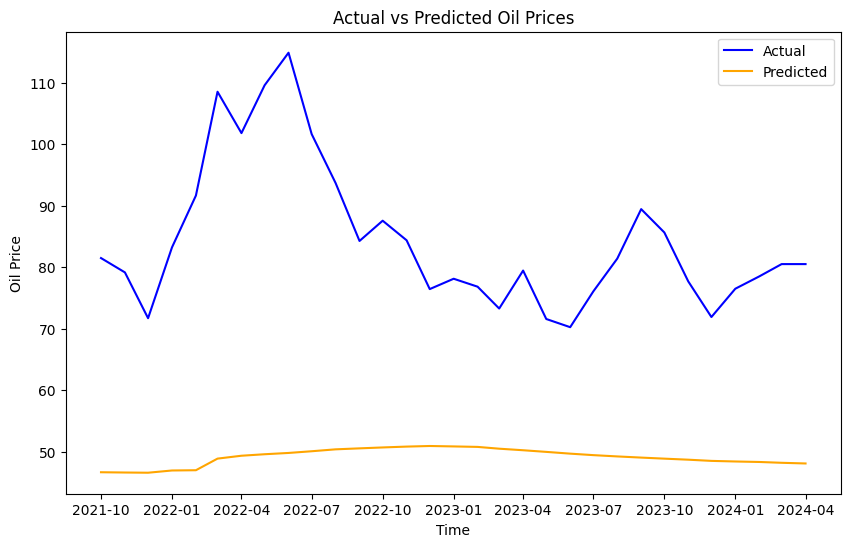

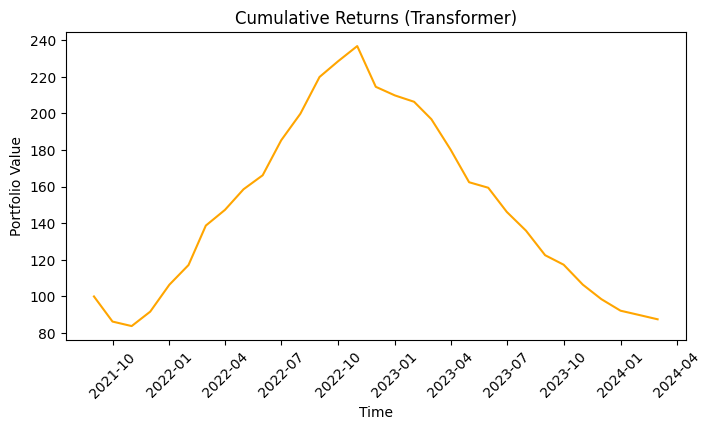

Transformer Model Metrics:
Sharpe Ratio: 0.01
Annualized Returns: -5.03 %
Maximum Drawdown: 63.05 %


In [192]:
# Make predictions on the validation set
y_valid_pred = model.predict(X_valid_seq).flatten()

# Compute evaluation metrics
mse = mean_squared_error(y_valid_seq, y_valid_pred)
mae = mean_absolute_error(y_valid_seq, y_valid_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate directional accuracy
actual_changes = np.sign(np.diff(y_valid_seq.values))
predicted_changes = np.sign(np.diff(y_valid_pred.ravel()))
correct_directions = np.sum(actual_changes == predicted_changes)
directional_accuracy = correct_directions / len(actual_changes)
directional_accuracy_percentage = directional_accuracy * 100
print("Directional Accuracy:", directional_accuracy_percentage, "%")

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_valid_seq.index[1:], y_valid_seq.values[1:], label='Actual', color='blue')
plt.plot(y_valid_seq.index[1:], y_valid_pred[:-1], label='Predicted', color='orange')  # Adjusted index
plt.title('Actual vs Predicted Oil Prices')
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.legend()
plt.show()

# Calculate returns based on trading signals for Transformer model
returns_transformer = pd.Series(index=y_valid_seq.index)
for i in range(1, len(y_valid_pred)):
    if np.sign(np.diff(y_valid_pred))[i-1] > 0:  # Buy signal
        returns_transformer.iloc[i] = (y_valid_seq.iloc[i] - y_valid_seq.iloc[i-1]) / y_valid_seq.iloc[i-    1]
    else:  # Sell signal
        returns_transformer.iloc[i] = (y_valid_seq.iloc[i-1] - y_valid_seq.iloc[i]) / y_valid_seq.iloc[i-1]


# Calculate Sharpe ratio for Transformer model
sharpe_ratio_transformer = returns_transformer.mean() / returns_transformer.std()

# Calculate cumulative returns starting with $100 for Transformer model
cumulative_returns_transformer = pd.Series(index=y_valid_seq.index)
cumulative_returns_transformer.iloc[0] = 100  # Initial investment of $100

for i in range(1, len(y_valid_pred)):
    if np.sign(np.diff(y_valid_seq))[i-1] > 0:  # Buy signal
        cumulative_returns_transformer.iloc[i] = cumulative_returns_transformer.iloc[i-1] * (1 + returns_transformer.iloc[i])
    elif np.sign(np.diff(y_valid_seq))[i-1] < 0:  # Sell signal
        cumulative_returns_transformer.iloc[i] = cumulative_returns_transformer.iloc[i-1] * (1 - returns_transformer.iloc[i])
cumulative_returns_transformer = cumulative_returns_transformer[:-1] # since last day no signal

# Visualize cumulative returns for Transformer model
plt.figure(figsize=(8, 4))
plt.plot(cumulative_returns_transformer.index, cumulative_returns_transformer.values, color='orange')
plt.title('Cumulative Returns (Transformer)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.xticks(rotation=45)
plt.show()

# Calculate annualized returns for Transformer model
annualized_returns_transformer = (cumulative_returns_transformer.iloc[-1] / cumulative_returns_transformer.iloc[0]) ** (12 / len(cumulative_returns_transformer)) - 1

# Calculate maximum drawdown for Transformer model
cumulative_max_transformer = cumulative_returns_transformer.cummax()
drawdown_transformer = (cumulative_max_transformer - cumulative_returns_transformer) / cumulative_max_transformer
max_drawdown_transformer = drawdown_transformer.max()

# Print metrics for Transformer model
print("Transformer Model Metrics:")
print("Sharpe Ratio:", round(sharpe_ratio_transformer, 2))
print("Annualized Returns:", round(annualized_returns_transformer * 100, 2), '%')
print("Maximum Drawdown:", round(max_drawdown_transformer * 100, 2), '%')
